In [16]:
# For reading data set
# importing necessary libraries

import pandas as pd #for dataframes
import numpy as np #for numerical and arithmatic operations
import matplotlib.pyplot as plt #for visualization
import statsmodels.formula.api as smf #for data mining and model building

In [17]:
#Importing Dataset Wc-At (Waist circumferance v/s Adipose tissues)
wcat=pd.read_csv("Datasets/wc-at.csv")
print(wcat.shape) #Checking shape of the data

(109, 2)


In [19]:
print(wcat.describe()) #Getting summary information of the data

            Waist          AT
count  109.000000  109.000000
mean    91.901835  101.894037
std     13.559116   57.294763
min     63.500000   11.440000
25%     80.000000   50.880000
50%     90.800000   96.540000
75%    104.000000  137.000000
max    121.000000  253.000000


(array([ 2.,  9., 19., 17., 11.,  9., 13., 21.,  5.,  3.]),
 array([ 63.5 ,  69.25,  75.  ,  80.75,  86.5 ,  92.25,  98.  , 103.75,
        109.5 , 115.25, 121.  ]),
 <BarContainer object of 10 artists>)

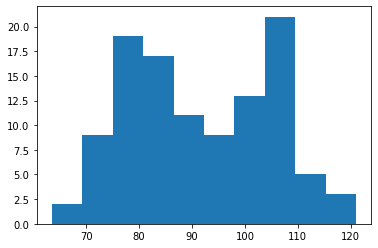

In [20]:
plt.hist(wcat.Waist) # Histogram of Waist circumferance

(array([14., 18., 16., 13., 17., 14.,  4.,  6.,  3.,  4.]),
 array([ 11.44 ,  35.596,  59.752,  83.908, 108.064, 132.22 , 156.376,
        180.532, 204.688, 228.844, 253.   ]),
 <BarContainer object of 10 artists>)

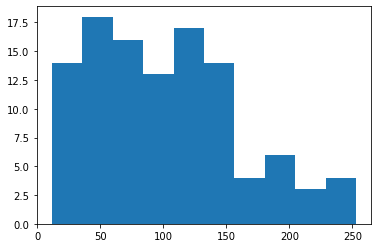

In [21]:
plt.hist(wcat.AT) # Histogram of Adipose Tissues

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac18dcd640>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac18dcdd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac18dcd2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac18dda460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac18dda7f0>],
 'means': []}

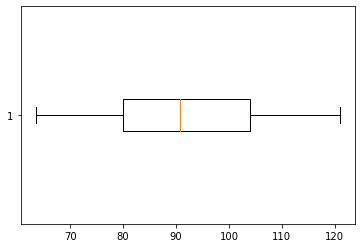

In [22]:
plt.boxplot(wcat.Waist, vert =  False) #Checking outliers if any in Waist

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac18e2cf40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac18e3a6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac18e2cbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac18e3adf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac18e481c0>],
 'means': []}

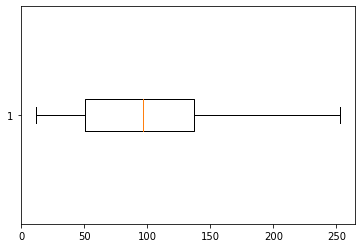

In [23]:
plt.boxplot(wcat.AT, vert =  False) #Checking outliers if any in AT

Text(0, 0.5, 'AT')

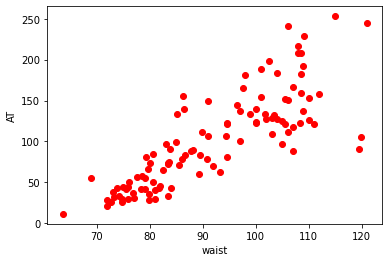

In [24]:
# Plotting scatter plot to check the relationship between Waist and AT
plt.plot(wcat.Waist,wcat.AT,"ro")
plt.xlabel("waist")
plt.ylabel("AT")

In [9]:
wcat.corr() # Corelation coefficient (r) matrix of our data 

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [25]:
wcat.AT.corr(wcat.Waist) # # correlation value between X (Waist) and Y (AT)

0.818557812895853

In [26]:
np.corrcoef(wcat.AT,wcat.Waist)

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [27]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf

model = smf.ols("AT ~ Waist",data=wcat).fit()

In [28]:
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [29]:
model.params # Model Parameters

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [14]:
model.summary() # Model Summary to check R-squered, Adjusted R-squered and P-values of the model parameteres

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.62e-27
Time:                        12:53:46   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Prdiction intervals for our model, alpha can be set as per our domain and for that we need to research about our domain
# to find which alpha will be a good fit, in this case the domain is medical science
# default alfa is 0.05
# Same way you can calculate such interval for every of your model

#from statsmodels.sandbox.regression.predstd import wls_prediction_std
#prstd, iv_l, iv_u = wls_prediction_std(model, alpha = 0.025)
#print(prstd)
#print('\n')
#print(pred)
#print('\n')
#print(iv_l)
#print('\n')
#print(iv_u)

In [27]:
model.conf_int(0.05) # 95% confidence interval for estimates or model parameter

,0,1
Intercept,-259.190053,-172.772923
Waist,2.993689,3.924030


In [30]:
pred = model.predict(wcat.Waist) # Predicted values of AT using the model

In [31]:
wcat.AT.head()

0    25.72
1    25.89
2    42.60
3    42.80
4    29.84
Name: AT, dtype: float64

In [32]:
pred.head()

0    42.568252
1    35.131704
2    66.953210
3    74.389758
4    42.222366
dtype: float64

In [33]:
error1 = wcat.AT - pred # Calculating errors in our model "model"

In [35]:
error1

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [36]:
np.mean(error1) # Checking avg. of errors, we know excellent model gives this very close to zero (e to the power -14 here) 

-9.321799193916911e-14

In [37]:
# Defining a function to calculate RMSE value (Root mean square error)
def RMSE(i):
    temp = np.sqrt(np.mean(i**2))
    return temp

In [38]:
RMSE(error1) # Calculating RMSE value for model "model"

32.76017749575514

In [39]:
model1_RMSE = RMSE(error1) # Storing RMSE of model "model" for future reference

   Waist     AT
0  74.75  25.72
1  72.60  25.89
2  81.80  42.60
3  83.95  42.80
4  74.65  29.84


Text(0, 0.5, 'TISSUE')

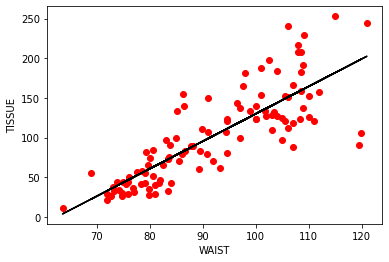

In [42]:
# Visualization of regresion line over the scatter plot of Waist and AT
# For visualization we need to import matplotlib.pyplot
# Black line is regression line

import matplotlib.pylab as plt
print(wcat.head(5))
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='red');
plt.plot(wcat['Waist'],pred,color='black');
plt.xlabel('WAIST');plt.ylabel('TISSUE')

In [43]:
pred.corr(wcat.AT) # 0.81 # Correlation of predicted value vs actual AT value, which is same as waist to AT

0.8185578128958534

Text(0, 0.5, 'Adipose TISSUE')

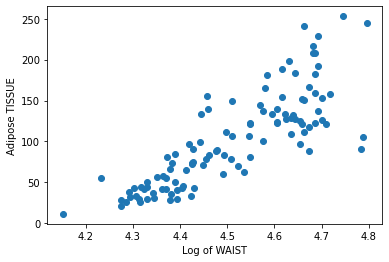

In [44]:
# Second Model - using Transformation - here we are doing Log Transformation on Waist
# Transforming variables for accuracy if possible

plt.scatter(np.log(wcat.Waist), wcat.AT);
plt.xlabel('Log of WAIST');plt.ylabel('Adipose TISSUE')

In [45]:
# correlation between original AT value and Log transformed Waist value, we can see improvement in it than earlier model
wcat.AT.corr(np.log(wcat.Waist)) 

0.8217781862645355

In [46]:
# Fitting the model on transformed data

model2 = smf.ols('AT~np.log(Waist)',data=wcat).fit()

In [48]:
model2.params

Intercept       -1328.341989
np.log(Waist)     317.135564
dtype: float64

In [49]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           6.80e-28
Time:                        10:00:05   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print(model2.conf_int(0.05)) # 95% confidence level

                         0            1
Intercept     -1518.498012 -1138.185966
np.log(Waist)   274.993649   359.277480


In [51]:
pred2 = model2.predict(wcat)

In [52]:
error2 = wcat.AT - pred2

In [54]:
np.mean(error2)

-1.7509337506895679e-13

In [57]:
RMSE(error2)

32.49688490932128

In [58]:
model2_RMSE = RMSE(error2)

In [59]:
pred2.corr(wcat.AT)

0.8217781862645354

Text(0, 0.5, 'TISSUE')

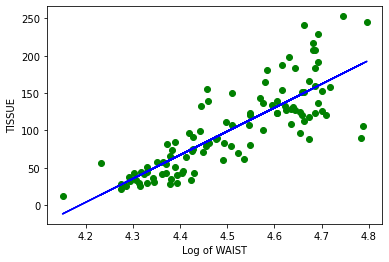

In [60]:
plt.scatter(x=np.log(wcat.Waist),y=wcat['AT'],color='green');
plt.plot(np.log(wcat.Waist),pred2,color='blue');
plt.xlabel('Log of WAIST');plt.ylabel('TISSUE')

Text(0, 0.5, 'Log Adipose TISSUE')

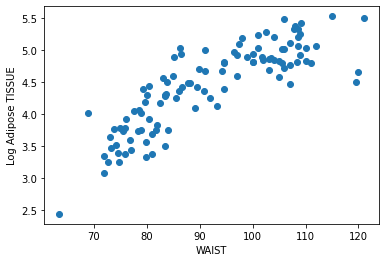

In [61]:
# Exponential transformation

plt.scatter(wcat.Waist, np.log(wcat.AT));

plt.xlabel('WAIST');plt.ylabel('Log Adipose TISSUE')

In [62]:
wcat.Waist.corr(np.log(wcat.AT))

0.8409006876081181

In [63]:
model3 = smf.ols('np.log(AT)~Waist',data=wcat).fit()

In [64]:
model3.params

Intercept    0.741021
Waist        0.040252
dtype: float64

In [40]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.68e-30
Time:                        14:37:33   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(model3.conf_int(0.05)) # 95% confidence level

                  0         1
Intercept  0.279862  1.202179
Waist      0.035288  0.045217


In [66]:
pred_log = model3.predict(wcat)

In [67]:
wcat.AT.head() #Actual values

0    25.72
1    25.89
2    42.60
3    42.80
4    29.84
Name: AT, dtype: float64

In [68]:
pred_log.head() #These are predicted values but in log format

0    3.749889
1    3.663346
2    4.033669
3    4.120211
4    3.745864
dtype: float64

In [69]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back

In [70]:
pred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [71]:
pred3.corr(wcat.AT)

0.7633804583650526

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.68e-30
Time:                        14:40:59   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'TISSUE')

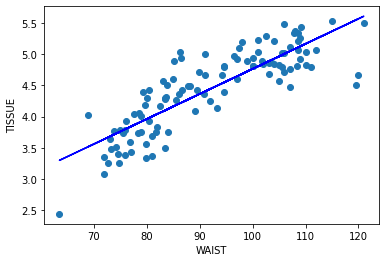

In [72]:
#plt.scatter(x=wcat['Waist'],y=np.log(wcat.AT),color='green');
plt.scatter(wcat.Waist, np.log(wcat.AT));
plt.plot(wcat.Waist,pred_log,color='blue');
plt.xlabel('WAIST');plt.ylabel('TISSUE')

In [73]:
error_3 = pred3-wcat.AT

In [74]:
np.mean(error_3)

-3.6591605443507658

In [75]:
RMSE(error_3)

38.529001758071445

In [76]:
model3_RMSE = RMSE(error_3)

Text(0, 0.5, 'Standardized Residual')

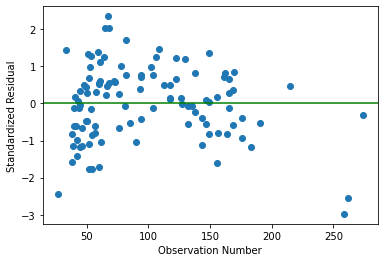

In [55]:
# so we will consider the model having highest R-Squared value which is the log transformation - model2
# getting residuals of the entire data set

#student_resid = model2.resid_pearson 

#student_resid

plt.plot(pred3,model3.resid_pearson,"o");
plt.axhline(y=0,color='green');
plt.xlabel("Observation Number");
plt.ylabel("Standardized Residual")

But can we do any other mathematical transformation on our data ? Can we try a polynomial model or quadratic polunomial ? Let's try

In [77]:
# Quadratic model

wcat["Waist_Sq"] = wcat.Waist*wcat.Waist
wcat.head()

,Waist,AT,Waist_Sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225


In [78]:
model_quad = smf.ols("np.log(AT) ~ Waist + Waist_Sq",data=wcat).fit() #np.log(AT)

In [79]:
np.log(wcat.AT)

0      3.247269
1      3.253857
2      3.751854
3      3.756538
4      3.395850
         ...   
104    4.820282
105    4.130355
106    4.890349
107    5.337538
108    5.337538
Name: AT, Length: 109, dtype: float64

In [80]:
model_quad.params

Intercept   -7.824071
Waist        0.228864
Waist_Sq    -0.001016
dtype: float64

In [81]:
model_quad.summary()# 0.672 was the Adj R2 for model 2  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.80e-35
Time:                        10:49:10   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
pred_quad = model_quad.predict(wcat) #predicted values again in the log format and needs to convert back in original by taking exp
print(pred_quad.head(5))

0    3.604938
1    3.434844
2    4.096771
3    4.226660
4    3.597235
dtype: float64


In [87]:
pred4=np.exp(pred_quad)
pred4.head(5)

0    36.779400
1    31.026570
2    60.145769
3    68.488132
4    36.497176
dtype: float64

In [88]:
error_4 = pred4-wcat.AT

In [89]:
np.mean(error_4)

-4.2426741884578565

In [90]:
RMSE(error_4)

32.24444782776208

In [91]:
model4_RMSE = RMSE(error_4)

Text(0, 0.5, 'TISSUE')

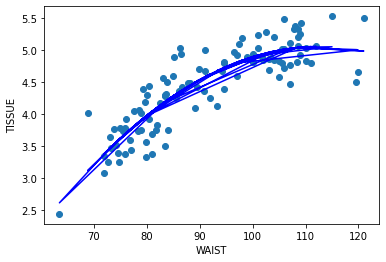

In [92]:
#plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green');
plt.scatter(wcat.Waist, np.log(wcat.AT));
plt.plot(wcat.Waist,pred_quad,color='blue');
plt.xlabel('WAIST');plt.ylabel('TISSUE')

In [24]:
model_quad.conf_int(0.05) 

,0,1
Intercept,-10.744361,-4.903782
Waist,0.165023,0.292706
Waist_Sq,-0.001359,-0.000673


Text(0, 0.5, 'Standardized Residual')

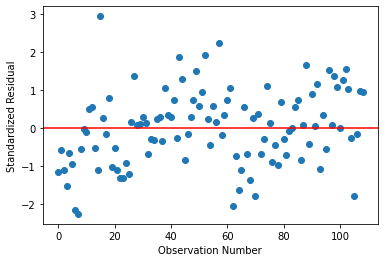

In [93]:
# Checking the distribution of errors and their variance from mean (approximately 0 here)

plt.scatter(np.arange(109),model_quad.resid_pearson);
plt.axhline(y=0,color='red');
plt.xlabel("Observation Number");
plt.ylabel("Standardized Residual")

(array([ 5.,  5., 16., 19., 27., 15., 14.,  5.,  2.,  1.]),
 array([-2.26761195, -1.74678239, -1.22595282, -0.70512326, -0.1842937 ,
         0.33653586,  0.85736542,  1.37819499,  1.89902455,  2.41985411,
         2.94068367]),
 <BarContainer object of 10 artists>)

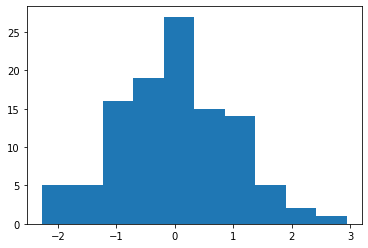

In [94]:
# Checking the distribution of errors and their variance from mean (approximately 0 here) using histogram

plt.hist(model_quad.resid_pearson) # histogram for residual values

So, above we have written 4 models of simple linear regression and we have tabulated the result in excel sheet to compare, let's check which model is best among above 4 in our SLR model summary file